# Lead Scoring Case Study

In [101]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [102]:
# Reading the dataset

Score=pd.read_csv('Leads.csv')

Score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Understanding

In [103]:
# Shape of the dataset

Score.shape

(9240, 37)

In [104]:
# data information

Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [105]:
Score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Cleaning the dataset

In [106]:
# Dropping below columns that are not required for builing model
drop_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']

Score_df=Score.drop(drop_cols,1)



In [107]:
Score_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


**Let's find out which columns/categories is having 'Select' label**

In [108]:
# Creating a for loop and the required columns are appended into a new list

cols=list(Score_df.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(Score_df[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
  
text # column names having label 'Select'

['Specialization', 'How did you hear about X Education', 'Lead Profile']

The columns' having 'Select' as a lable are **'Specialization', 'How did you hear about X Education', 'Lead Profile'.**

In [109]:
# Now replacing label 'Select' with nan values

# Copying the required columns in sepearate DataFrame

df_1=pd.DataFrame(Score_df['Specialization'])
df_2=pd.DataFrame(Score_df['How did you hear about X Education'])
df_3=pd.DataFrame(Score_df['Lead Profile'])

In [110]:
# Replacing 'Select' label with nan values

df_1=df_1.replace(df_1.loc[df_1['Specialization']=='Select'],value=np.nan)
df_2=df_2.replace(df_2.loc[df_2['How did you hear about X Education']=='Select'],value=np.nan)
df_3=df_3.replace(df_3.loc[df_3['Lead Profile']=='Select'],value=np.nan)

In [111]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset df_1

Score_df['Specialization']=df_1['Specialization']
Score_df['How did you hear about X Education']=df_2['How did you hear about X Education']
Score_df['Lead Profile']=df_3['Lead Profile']

**Now, we have replaced the label 'Select' with null values**

In [112]:
# Check for missing values

round(Score_df.isnull().sum()/len(Score_df)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

From above percentage of columns shows that some columns are having **more than 30% of missing values**, so it is better to remove these columns because it is **not a great move** if we are imputing more than approx. 30% of data based on **predictions** and **assumptions**.

In [113]:
# Droping Columns having more than 30% of missing values

drop_cols1=Score_df.isnull().sum()
drop_cols1=drop_cols1[drop_cols1.values/len(Score_df)>0.30]
len(drop_cols1)

9

Columns we found that are having 30% of missing values in the dataset, so let's get rid of them.

In [114]:
# Dropping 9 columns and checking the remaining columns for missing values

drop_columns=list(drop_cols1.keys())
Score_df=Score_df.drop(drop_columns,1)  
round(Score_df.isnull().sum()/len(Score_df)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

The 9 columns were removed which were having more than 30% of missing values.

We will impute the columns having missing value less than 30% with mode value

In [115]:
Score_df['Lead Source'].value_counts().head()   

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [116]:
Score_df['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [117]:
Score_df['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

In [118]:
Score_df['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [119]:
Score_df['What is your current occupation'].value_counts().head()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

In [120]:
Score_df['What matters most to you in choosing a course'].value_counts().head()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [121]:
# Now, imputing these values in our missing values dataset for respective categories

missing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

Score_df=Score_df.fillna(value=missing_values)


In [122]:
Score_df.isnull().sum()  

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

In [123]:
Score_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

For Lead Source, we have both Google and google which should be equal

In [124]:
Score_df['Lead Source']=Score_df['Lead Source'].apply(lambda x:x.capitalize())
Score_df['Lead Source'].value_counts()


Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Press_release           2
Social media            2
Live chat               2
Pay per click ads       1
Blog                    1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Welearn                 1
Nc_edm                  1
Name: Lead Source, dtype: int64

# Data Transformation

Assigning numerical variables to categories with 'Yes' to 1 and 'No' to 0

In [125]:
# Yes : 1 , No : 0

category={"No":0,"Yes":1}

Score_df['Do Not Email']=Score_df['Do Not Email'].map(category)
Score_df['Do Not Call']=Score_df['Do Not Call'].map(category)
Score_df['Search']=Score_df['Search'].map(category)
Score_df['Magazine']=Score_df['Magazine'].map(category)
Score_df['Newspaper Article']=Score_df['Newspaper Article'].map(category)
Score_df['X Education Forums']=Score_df['X Education Forums'].map(category)
Score_df['Newspaper']=Score_df['Newspaper'].map(category)
Score_df['Digital Advertisement']=Score_df['Digital Advertisement'].map(category)
Score_df['Through Recommendations']=Score_df['Through Recommendations'].map(category)
Score_df['Receive More Updates About Our Courses']=Score_df['Receive More Updates About Our Courses'].map(category)
Score_df['Update me on Supply Chain Content']=Score_df['Update me on Supply Chain Content'].map(category)
Score_df['Get updates on DM Content']=Score_df['Get updates on DM Content'].map(category)

In [126]:
Score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [127]:
# Creating a dummy variables for 8 categories and dropping the first level.

dummy=pd.get_dummies(Score_df[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset

Score_df=pd.concat([Score_df,dummy],axis=1)


**Now, Removing duplicate columns or repeated columns**

In [128]:
# We have created dummies for below categories hence removing the original column

dupl=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


Score_df=Score_df.drop(dupl,1)


In [129]:
# Dropping redundant variables

redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

Score_df=Score_df.drop(redundant,1)

In [130]:
# Converting  categories to numercial as they are imported as an 'Object'
Score_df[['TotalVisits','Page Views Per Visit']]=Score_df[['TotalVisits','Page Views Per Visit']].astype('float')

Score_df[['TotalVisits','Page Views Per Visit']]=Score_df[['TotalVisits','Page Views Per Visit']].astype('int64')

Score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype
---  ------                                                                   --------------  -----
 0   Do Not Email                                                             9240 non-null   int64
 1   Do Not Call                                                              9240 non-null   int64
 2   Converted                                                                9240 non-null   int64
 3   TotalVisits                                                              9240 non-null   int64
 4   Total Time Spent on Website                                              9240 non-null   int64
 5   Page Views Per Visit                                                     9240 non-null   int64
 6   Search                                                                   9240 non-null  

**From above it states that all variables are numericals**

## Checking for Outliers

In [131]:
round(Score_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.26,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.17,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,1.00,5.00,936.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,1.00,0.00,1.00,10.00,1562.00,6.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


As we can see there are outliers in 2 variables 'TotalVisits' and 'Page Views Per Visit'.

Let's visualize the outliers using boxplot to understand the outliers.

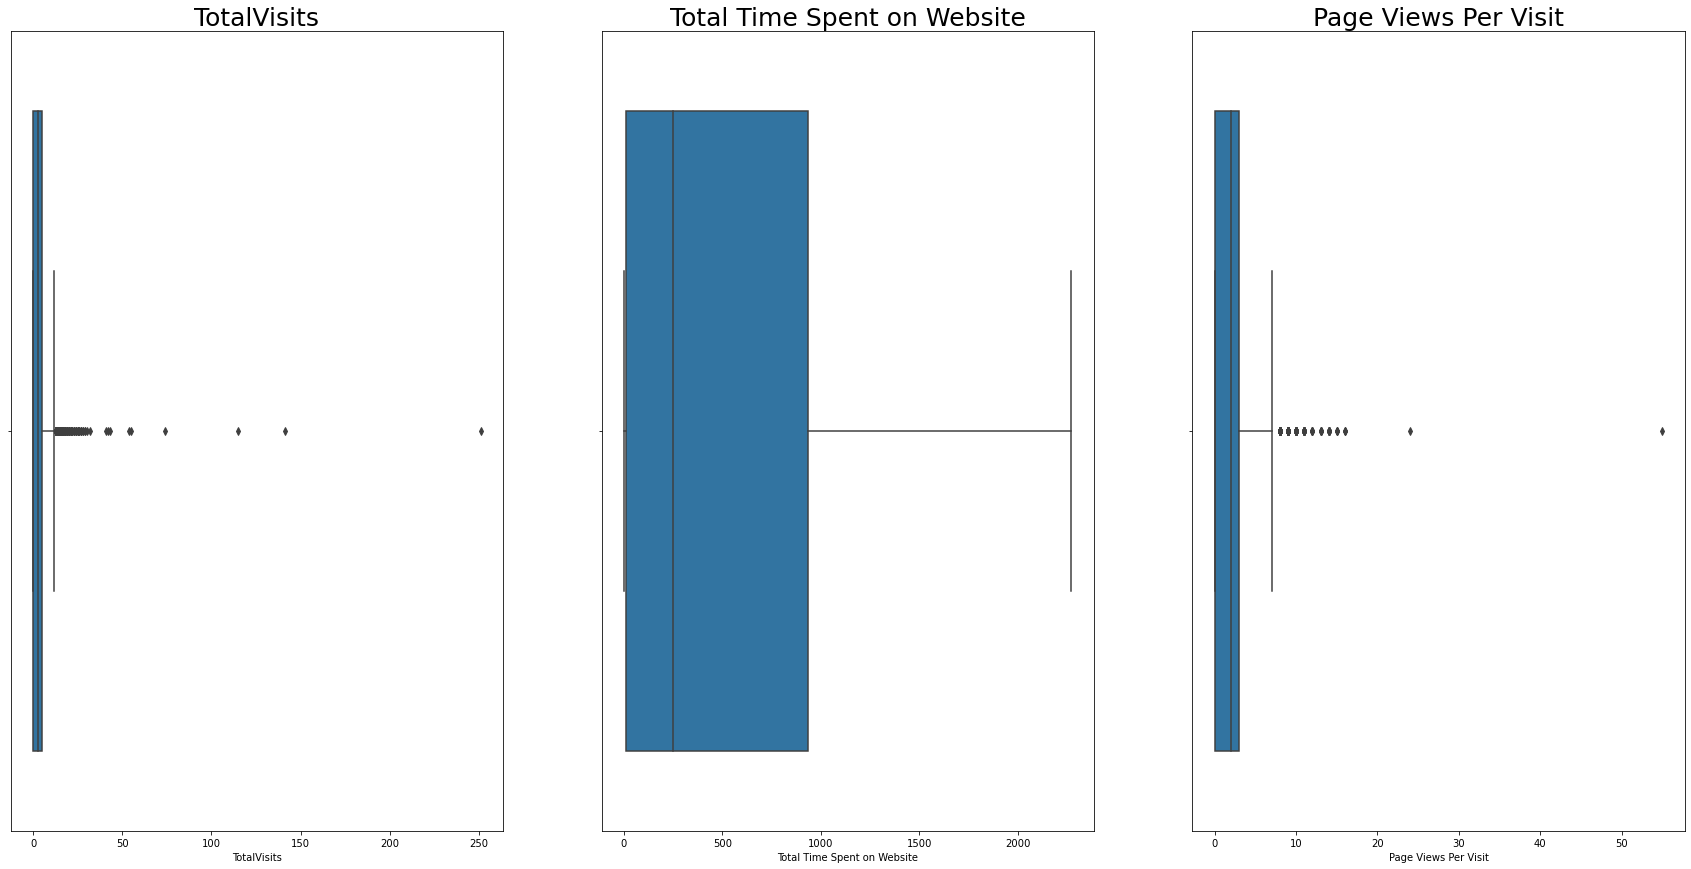

In [133]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(30,50))


# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=25)
    sns.boxplot(x=Score_df[col[i]],data=Score_df)
        

  

From the above boxplots we can now confirm that we have two outlier variables in our dataset **('TotalVisits' and 'Page Views Per Visit')**. Now as per business requirement we cannot drop these outliers because it may impact our analysis/model so we will **create bins** for these two outliers.

### Creating bins

In [134]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    Score_df[list(ranges_total_visits.keys())[i]]=Score_df['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [135]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    Score_df[list(ranges_total_visits_1.keys())[i]]=Score_df['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

In [136]:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

Score_df=Score_df.drop(redundant,axis=1)

Score_df.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# Data Preparation

### Train-Test Split 

In [137]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [138]:
# Separating target varaible from dependent variable

y=Score_df['Converted']     # putting target varaible 'Converted' to a new series 'y'

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [139]:
# Putting dependent variable in a new dataset called 'X'

X=Score_df.drop('Converted',1)

X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [140]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Standardization

In [141]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [142]:
# Now, Scalling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()


,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [143]:
## Checking the conversion rate from converted

(sum(y)/len(y.index))*100

38.53896103896104

We have conversion rate of almost 39%

### Correlation of the dataset

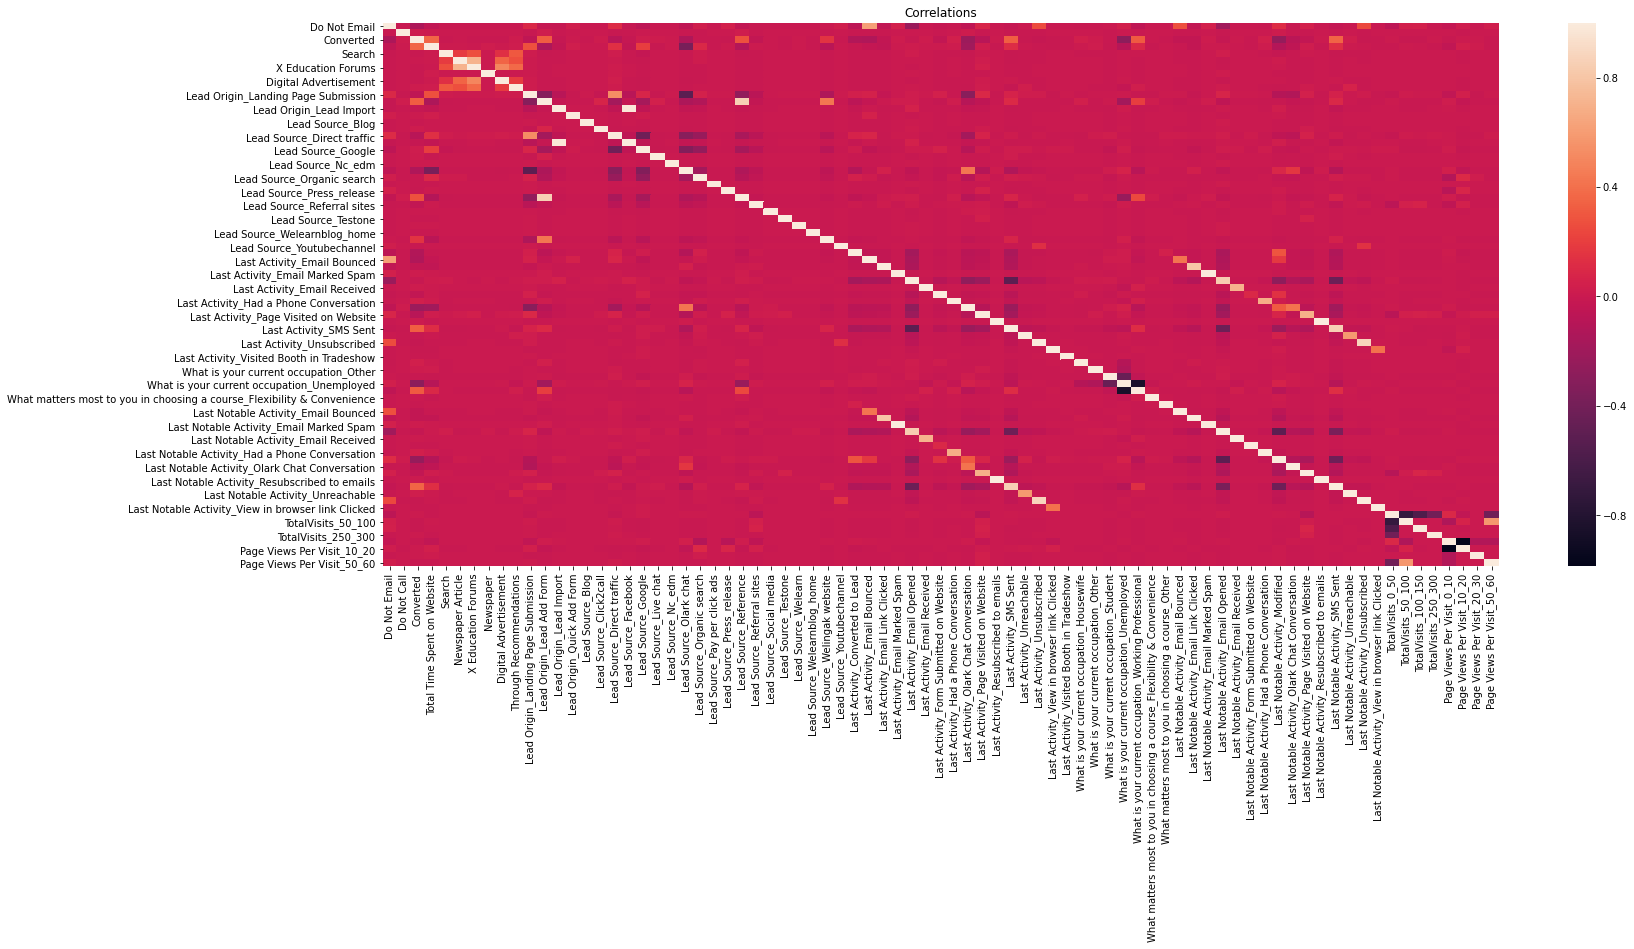

In [144]:
plt.figure(figsize=(25,10))
plt.title('Correlations')
sns.heatmap(Score_df.corr())

plt.show()

From the above heatmap, we saw that there are two variables having high correlation, so we going to drop them.

**Dropping highly correlated dummy variable/categories**

In [145]:
corr_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']

X_train=X_train.drop(corr_dummy,1)     
X_test=X_test.drop(corr_dummy,1)    

# Building a Model

In [146]:
# importing necessary library

import statsmodels.api as sm

In [147]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Gaussian   Df Model:                           69
Link Function:               identity   Scale:                         0.13679
Method:                          IRLS   Log-Likelihood:                -2709.0
Date:                Mon, 25 Sep 2023   Deviance:                       875.15
Time:                        23:14:14   Pearson chi2:                     875.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    7.298e+11   9.73e+11      0.750      0.453   -1.18e+12    2.64e+12
Do Not Email                                                               -0.1234      0.025     -5.035      0.000      -0.171      -0.075
Do Not Call                                                                 0.4911      0.262      1.874      0.061      -0.022       1.005
Total Time Spent on Website                                                 0.1834      0.005     35.205      0.000       0.173       0.194
Search                                                                      0.0875      0.121      0.721      0.471      -0.150       0.325
Newspaper Article                                                           0.6360      0.371      1.716      0.086      -0.090       1.362
X Education Forums                                                         -0.7060      0.611     -1.156      0.248      -1.903       0.491
Newspaper                                                                  -0.6884      0.370     -1.860      0.063      -1.414       0.037
Digital Advertisement                                                      -0.3812      0.262     -1.456      0.145      -0.894       0.132
Through Recommendations                                                     0.1409      0.157      0.896      0.370      -0.167       0.449
Lead Origin_Landing Page Submission                                        -0.0251      0.014     -1.849      0.064      -0.052       0.002
Lead Origin_Lead Add Form                                                   0.4843      0.071      6.795      0.000       0.345       0.624
Lead Origin_Lead Import                                                     0.1788      0.264      0.676      0.499      -0.339       0.697
Lead Origin_Quick Add Form                                                  0.3387      0.371      0.912      0.362      -0.389       1.067
Lead Source_Blog                                                           -0.4800      0.370     -1.296      0.195      -1.206       0.246
Lead Source_Click2call                                                     -0.1598      0.226     -0.708      0.479      -0.602       0.283
Lead Source_Direct traffic                                                 -0.1738      0.020     -8.669      0.000      -0.213      -0.135
Lead Source_Facebook                                                       -0.3497      0.265     -1.322      0.186      -0.868       0.169
Lead Source_Google                                                         -0.1201      0.017     -7.045      0.000      -0.154      -0.087
Lea

From the above summary presented by generalizing linear model, we can tell that there are so many variable with insignificant p-values. Here we will **use rfe** for feature selection as we have 70 variables and checking one by one is not an efficient way to do so.

## Using RFE

In [148]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression()             

## Running RFE with two different variables count to find best model

### RFE Test - 1

In [149]:
#19 variables

rfem = RFE(logreg,19)

rfem = rfem.fit(X_train,y_train)

In [150]:
rfem.support_  # checking for ture and false assigned to the variables after rfe

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [151]:
col=X_train.columns[rfem.support_]

X_train_1=sm.add_constant(X_train[col])   

In [152]:
# creating 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.1
Date:                Mon, 25 Sep 2023   Deviance:                       5358.3
Time:                        23:14:19   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1701      0.104     11.259      0.000       0.966       1.374
Do Not Email                                            -1.2346      0.193     -6.382      0.000      -1.614      -0.855
Total Time Spent on Website                              1.0853      0.039     27.645      0.000       1.008       1.162
Lead Origin_Lead Add Form                                2.7400      0.195     14.053      0.000       2.358       3.122
Lead Source_Direct traffic                              -1.2903      0.114    -11.343      0.000      -1.513      -1.067
Lead Source_Google                                      -0.9024      0.107     -8.460      0.000      -1.111      -0.693
Lead Source_Organic search                              -1.0645      0.132     -8.043      0.000      -1.324      -0.805
Lead Source_Referral sites                              -1.1262      0.312     -3.605      0.000      -1.739      -0.514
Lead Source_Welingak website                             1.8681      0.744      2.512      0.012       0.410       3.326
Last Activity_Converted to Lead                         -1.0016      0.226     -4.435      0.000      -1.444      -0.559
Last Activity_Email Bounced                             -1.0933      0.345     -3.171      0.002      -1.769      -0.418
Last Activity_Olark Chat Conversation                   -1.1949      0.193     -6.182      0.000      -1.574      -0.816
What is your current occupation_Housewife               22.8758   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.7957      0.188     14.846      0.000       2.427       3.165
Last Notable Activity_Email Link Clicked                -1.8728      0.275     -6.818      0.000      -2.411      -1.334
Last Notable Activity_Email Opened                      -1.3280      0.087    -15.274      0.000      -1.498      -1.158
Last Notable Activity_Had a Phone Conversation           2.0560      1.105      1.861      0.063      -0.110       4.222
Last Notable Activity_Modified                          -1.7097      0.099    -17.196      0.000      -1.905      -1.515
Last Notable Activity_Olark Chat Conversation           -1.4494      0.374     -3.876      0.000      -2.182      -0.717
Last Notable Activity_Page Visited on Website           -1.5749      0.192     -8.219      0.000      -1.950      -1.199
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.


## Calculating VIF

In [153]:
# importing library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
vif=pd.DataFrame()
vif['Features']=X_train_1[col].columns  
vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)


vif  

,Features,VIF
16,Last Notable Activity_Modified,2.58
0,Do Not Email,1.89
10,Last Activity_Olark Chat Conversation,1.82
9,Last Activity_Email Bounced,1.80
4,Lead Source_Google,1.79
3,Lead Source_Direct traffic,1.73
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.46
17,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.30


**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

As expained before we will drop the highest in-significant features 

In [155]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [156]:
# Creating a new model

X_train_2=sm.add_constant(X_train_2)                             
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  
reg2=logis2.fit()                                              
reg2.summary()                                                   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13833
Method:                          IRLS   Log-Likelihood:                -2770.9
Date:                Mon, 25 Sep 2023   Deviance:                       892.07
Time:                        23:14:19   Pearson chi2:                     892.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6560      0.015     43.729      0.000       0.627       0.685
Do Not Email                                            -0.1504      0.023     -6.609      0.000      -0.195      -0.106
Total Time Spent on Website                              0.1842      0.005     35.569      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4043      0.022     18.503      0.000       0.361       0.447
Lead Source_Direct traffic                              -0.1856      0.016    -11.910      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1245      0.015     -8.360      0.000      -0.154      -0.095
Lead Source_Organic search                              -0.1509      0.018     -8.238      0.000      -0.187      -0.115
Lead Source_Referral sites                              -0.1718      0.041     -4.232      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1848      0.043      4.262      0.000       0.100       0.270
Last Activity_Converted to Lead                         -0.1096      0.024     -4.548      0.000      -0.157      -0.062
Last Activity_Email Bounced                             -0.0636      0.033     -1.953      0.051      -0.127       0.000
Last Activity_Olark Chat Conversation                   -0.1395      0.020     -6.881      0.000      -0.179      -0.100
What is your current occupation_Working Professional     0.3435      0.018     19.021      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3005      0.036     -8.447      0.000      -0.370      -0.231
Last Notable Activity_Email Opened                      -0.2243      0.013    -17.590      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2275      0.113      2.020      0.043       0.007       0.448
Last Notable Activity_Modified                          -0.2816      0.014    -20.757      0.000      -0.308      -0.255
Last Notable Activity_Olark Chat Conversation           -0.2654      0.040     -6.651      0.000      -0.344      -0.187
Last Notable Activity_Page Visited on Website           -0.2662      0.026    -10.138      0.000      -0.318      -0.215
========================================================================================================================
"""

In [157]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant

X_train_3=X_train_2.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [158]:
# Recreating a new model

X_train_3=sm.add_constant(X_train_3)                                
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    
reg3=logis3.fit()                                                   
reg3.summary()                                                     

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.13839
Method:                          IRLS   Log-Likelihood:                -2772.9
Date:                Mon, 25 Sep 2023   Deviance:                       892.63
Time:                        23:14:19   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6575      0.015     43.876      0.000       0.628       0.687
Do Not Email                                            -0.1510      0.023     -6.636      0.000      -0.196      -0.106
Total Time Spent on Website                              0.1843      0.005     35.568      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4037      0.022     18.470      0.000       0.361       0.446
Lead Source_Direct traffic                              -0.1857      0.016    -11.915      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1241      0.015     -8.334      0.000      -0.153      -0.095
Lead Source_Organic search                              -0.1510      0.018     -8.242      0.000      -0.187      -0.115
Lead Source_Referral sites                              -0.1720      0.041     -4.235      0.000      -0.252      -0.092
Lead Source_Welingak website                             0.1849      0.043      4.262      0.000       0.100       0.270
Last Activity_Converted to Lead                         -0.1097      0.024     -4.552      0.000      -0.157      -0.062
Last Activity_Email Bounced                             -0.0633      0.033     -1.943      0.052      -0.127       0.001
Last Activity_Olark Chat Conversation                   -0.1396      0.020     -6.882      0.000      -0.179      -0.100
What is your current occupation_Working Professional     0.3438      0.018     19.036      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3020      0.036     -8.488      0.000      -0.372      -0.232
Last Notable Activity_Email Opened                      -0.2259      0.013    -17.744      0.000      -0.251      -0.201
Last Notable Activity_Modified                          -0.2831      0.014    -20.891      0.000      -0.310      -0.257
Last Notable Activity_Olark Chat Conversation           -0.2669      0.040     -6.688      0.000      -0.345      -0.189
Last Notable Activity_Page Visited on Website           -0.2676      0.026    -10.196      0.000      -0.319      -0.216
========================================================================================================================
"""

Now, from the above summary we can see that there is still one in-significant variable present in the dataset i.e **'Last Activity_Email Bounced'**, hence we need to drop this variable and recreate a new model

In [159]:
# Dropping the most insignificant values ('Last Notable Activity_Email Bounced') and constant

X_train_5=X_train_3.drop(['const','Last Activity_Email Bounced'],1)


In [160]:
# Recreating a new model

X_train_5=sm.add_constant(X_train_5)                              # Adding constant
logis5=sm.GLM(y_train,X_train_5,families=sm.families.Binomial())  # Using GLM, creating model
reg5=logis5.fit()                                                 # Fitting our model
reg5.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13845
Method:                          IRLS   Log-Likelihood:                -2774.8
Date:                Mon, 25 Sep 2023   Deviance:                       893.15
Time:                        23:14:19   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6580      0.015     43.910      0.000       0.629       0.687
Do Not Email                                            -0.1779      0.018     -9.838      0.000      -0.213      -0.142
Total Time Spent on Website                              0.1841      0.005     35.533      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4044      0.022     18.505      0.000       0.362       0.447
Lead Source_Direct traffic                              -0.1854      0.016    -11.897      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1234      0.015     -8.287      0.000      -0.153      -0.094
Lead Source_Organic search                              -0.1502      0.018     -8.196      0.000      -0.186      -0.114
Lead Source_Referral sites                              -0.1714      0.041     -4.220      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1864      0.043      4.296      0.000       0.101       0.271
Last Activity_Converted to Lead                         -0.1065      0.024     -4.428      0.000      -0.154      -0.059
Last Activity_Olark Chat Conversation                   -0.1352      0.020     -6.706      0.000      -0.175      -0.096
What is your current occupation_Working Professional     0.3441      0.018     19.045      0.000       0.309       0.379
Last Notable Activity_Email Link Clicked                -0.3028      0.036     -8.509      0.000      -0.373      -0.233
Last Notable Activity_Email Opened                      -0.2268      0.013    -17.828      0.000      -0.252      -0.202
Last Notable Activity_Modified                          -0.2873      0.013    -21.482      0.000      -0.314      -0.261
Last Notable Activity_Olark Chat Conversation           -0.2707      0.040     -6.792      0.000      -0.349      -0.193
Last Notable Activity_Page Visited on Website           -0.2647      0.026    -10.099      0.000      -0.316      -0.213
========================================================================================================================
"""

Now, from the above summary we can say that all the variables present in this model are **significant** as no variables is having p - value greater than 5% hence we can proceed with our next step

## Creating VIF

After creating a model with no in significant features lets check the VIF i.e multicollinearity as we have checked earlier there was no such thing were found after creating VIF - all VIF vallues are less than 5 which means our **final model is ready**.

In [161]:
# Checking VIF again just to be sure

X_train_5_1=X_train_5.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_5_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_5_1.values,i) for i in range(X_train_5_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
13,Last Notable Activity_Modified,2.50
9,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Google,1.77
12,Last Notable Activity_Email Opened,1.73
3,Lead Source_Direct traffic,1.72
2,Lead Origin_Lead Add Form,1.46
14,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.29
7,Lead Source_Welingak website,1.24
8,Last Activity_Converted to Lead,1.24


As confirmed earlier, **no sign of multicollinearity** shown from above vif dataframe hence reg5 is our final model and we are going to use it predict the X train dataset.

## Predicting a Train model

In [162]:
# Predicting the train dataset with our final model

y_train_pred=reg5.predict(X_train_5)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()  


,Converted,Converted_probability,ID
1871,0,0.268197,1871
6795,0,0.246838,6795
3516,0,0.303907,3516
8105,0,0.785984,8105
3934,0,0.207716,3934


## ROC Curve Plotting

- ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate. 
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [163]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

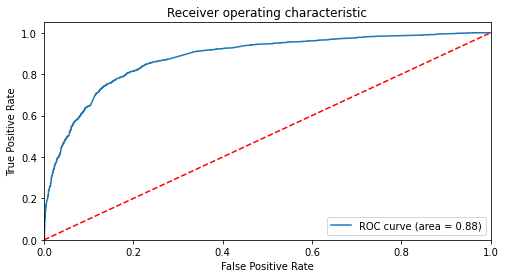

In [164]:
# Calling the roc curve for plotting

edu_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 88% of the total area.

#### Finding optimal probability cutoff point

In [165]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0


In [166]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i]) 
    total=sum(sum(cm_matrix))                                                          
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                       
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                        
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                         
print(df_cutoffs)   

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.431973    0.995539     0.084708
0.1          0.1  0.559833    0.974453     0.304348
0.2          0.2  0.690012    0.940795     0.535482
0.3          0.3  0.787879    0.864558     0.740630
0.4          0.4  0.809524    0.793998     0.819090
0.5          0.5  0.802257    0.646796     0.898051
0.6          0.6  0.784477    0.532036     0.940030
0.7          0.7  0.750618    0.393350     0.970765
0.8          0.8  0.718615    0.287510     0.984258
0.9          0.9  0.682127    0.173966     0.995252


In [167]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 ) 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0,0


## Precision and Recall

Let's create precision and recall using confusion matrix for the final dataset ass we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned. 

In [168]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3278,  724],
       [ 508, 1958]], dtype=int64)

In [169]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.7300521998508576
Recall 0.7939983779399837


Important point to be noted from the outcomes for precision and recall score -
- Our precison percentage is 73% approximately and recall  percentage is 79%
- This means we have very good model which explains relevancy of 73% and true relevant results about 79%.

### RFE Test - 2

In [170]:
# Running RFE with variables 15

rfem2= RFE(logreg, 15)
rfem2= rfem2.fit(X_train,y_train)
rfem2.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [171]:
col2=X_train.columns[rfem2.support_]

X_train_rfe2=sm.add_constant(X_train[col2]) 

In [172]:
# creating 1st model after RFE

logis_rfe2=sm.GLM(y_train,X_train_rfe2,family=sm.families.Binomial())

reg_rfe2=logis_rfe2.fit()

reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.8
Date:                Mon, 25 Sep 2023   Deviance:                       5493.6
Time:                        23:14:24   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2894      0.065      4.473      0.000       0.163       0.416
Do Not Email                                            -1.3263      0.190     -6.973      0.000      -1.699      -0.954
Total Time Spent on Website                              0.9265      0.035     26.714      0.000       0.859       0.994
Lead Origin_Lead Add Form                                3.3839      0.186     18.172      0.000       3.019       3.749
Lead Source_Welingak website                             1.9606      0.743      2.638      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1618      0.221     -5.263      0.000      -1.594      -0.729
Last Activity_Email Bounced                             -1.0321      0.336     -3.068      0.002      -1.691      -0.373
Last Activity_Olark Chat Conversation                   -0.7956      0.191     -4.168      0.000      -1.170      -0.421
What is your current occupation_Housewife               22.7265    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
What is your current occupation_Working Professional     2.7547      0.187     14.755      0.000       2.389       3.121
Last Notable Activity_Email Link Clicked                -1.7558      0.274     -6.403      0.000      -2.293      -1.218
Last Notable Activity_Email Opened                      -1.2958      0.085    -15.159      0.000      -1.463      -1.128
Last Notable Activity_Had a Phone Conversation           1.8669      1.091      1.711      0.087      -0.272       4.005
Last Notable Activity_Modified                          -1.6631      0.098    -17.055      0.000      -1.854      -1.472
Last Notable Activity_Olark Chat Conversation           -1.3184      0.370     -3.568      0.000      -2.043      -0.594
Last Notable Activity_Page Visited on Website           -1.6038      0.187     -8.582      0.000      -1.970      -1.238
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.


## Calculating VIF

In [173]:
# Creating vif dataframe

vif=pd.DataFrame()
vif['Features']=X_train_rfe2[col2].columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2[col2].values,i) for i in range(X_train_rfe2[col2].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)


vif   

,Features,VIF
12,Last Notable Activity_Modified,1.85
0,Do Not Email,1.81
5,Last Activity_Email Bounced,1.79
6,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.24
4,Last Activity_Converted to Lead,1.23
8,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09


As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.

As expained before we will drop the highly in-significant features i.e **'What is your current occupation_Housewife'** having 0.999 p - value.

In [174]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_rfe22=X_train_rfe2.drop(['const','What is your current occupation_Housewife'],1)

In [175]:
# Creating a new model

X_train_rfe22=sm.add_constant(X_train_rfe22)                              # Adding constant
logis_rfe22=sm.GLM(y_train,X_train_rfe22,families=sm.families.Binomial())  # Using GLM, creating model
reg_rfe22=logis_rfe22.fit()                                                 # Fitting our model
reg_rfe22.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14139
Method:                          IRLS   Log-Likelihood:                -2843.8
Date:                Mon, 25 Sep 2023   Deviance:                       912.40
Time:                        23:14:24   Pearson chi2:                     912.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5318      0.010     52.675      0.000       0.512       0.552
Do Not Email                                            -0.1751      0.023     -7.651      0.000      -0.220      -0.130
Total Time Spent on Website                              0.1654      0.005     33.650      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5120      0.020     25.722      0.000       0.473       0.551
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1432      0.024     -5.917      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0590      0.033     -1.794      0.073      -0.124       0.005
Last Activity_Olark Chat Conversation                   -0.0713      0.020     -3.640      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3447      0.018     18.882      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.2886      0.036     -8.041      0.000      -0.359      -0.218
Last Notable Activity_Email Opened                      -0.2239      0.013    -17.373      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2339      0.114      2.056      0.040       0.011       0.457
Last Notable Activity_Modified                          -0.2796      0.014    -20.409      0.000      -0.306      -0.253
Last Notable Activity_Olark Chat Conversation           -0.2610      0.040     -6.470      0.000      -0.340      -0.182
Last Notable Activity_Page Visited on Website           -0.2784      0.027    -10.501      0.000      -0.330      -0.226
========================================================================================================================
"""

Again, we can see from above summary that variable 'Last Notable Activity_Had a Phone Conversation' is in-significant hence dropping it and recreating a new model.

In [176]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant

X_train_rfe23=X_train_rfe22.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [177]:
# Creating a new model

X_train_rfe23=sm.add_constant(X_train_rfe23)                              
logis_rfe23=sm.GLM(y_train,X_train_rfe23,families=sm.families.Binomial()) 
reg_rfe23=logis_rfe23.fit()                                                
reg_rfe23.summary()                                                   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14146
Method:                          IRLS   Log-Likelihood:                -2845.9
Date:                Mon, 25 Sep 2023   Deviance:                       913.00
Time:                        23:14:24   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5335      0.010     52.996      0.000       0.514       0.553
Do Not Email                                            -0.1758      0.023     -7.681      0.000      -0.221      -0.131
Total Time Spent on Website                              0.1654      0.005     33.655      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5113      0.020     25.683      0.000       0.472       0.550
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1433      0.024     -5.922      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0587      0.033     -1.785      0.074      -0.123       0.006
Last Activity_Olark Chat Conversation                   -0.0714      0.020     -3.644      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3450      0.018     18.895      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2902      0.036     -8.085      0.000      -0.361      -0.220
Last Notable Activity_Email Opened                      -0.2255      0.013    -17.530      0.000      -0.251      -0.200
Last Notable Activity_Modified                          -0.2811      0.014    -20.543      0.000      -0.308      -0.254
Last Notable Activity_Olark Chat Conversation           -0.2625      0.040     -6.507      0.000      -0.342      -0.183
Last Notable Activity_Page Visited on Website           -0.2799      0.027    -10.561      0.000      -0.332      -0.228
========================================================================================================================
"""

In [178]:
X_train_rfe25=X_train_rfe23.drop(['const','Last Activity_Email Bounced'],1)

In [179]:
# Creating a new model

X_train_rfe25=sm.add_constant(X_train_rfe25)                             
logis_rfe25=sm.GLM(y_train,X_train_rfe25,families=sm.families.Binomial())  
reg_rfe25=logis_rfe25.fit()                                                
reg_rfe25.summary()                                                  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.14151
Method:                          IRLS   Log-Likelihood:                -2847.5
Date:                Mon, 25 Sep 2023   Deviance:                       913.45
Time:                        23:14:24   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5344      0.010     53.150      0.000       0.515       0.554
Do Not Email                                            -0.2008      0.018    -11.072      0.000      -0.236      -0.165
Total Time Spent on Website                              0.1653      0.005     33.634      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5117      0.020     25.699      0.000       0.473       0.551
Lead Source_Welingak website                             0.1923      0.044      4.384      0.000       0.106       0.278
Last Activity_Converted to Lead                         -0.1402      0.024     -5.808      0.000      -0.188      -0.093
Last Activity_Olark Chat Conversation                   -0.0675      0.019     -3.466      0.001      -0.106      -0.029
What is your current occupation_Working Professional     0.3452      0.018     18.903      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2910      0.036     -8.107      0.000      -0.361      -0.221
Last Notable Activity_Email Opened                      -0.2264      0.013    -17.610      0.000      -0.252      -0.201
Last Notable Activity_Modified                          -0.2851      0.014    -21.104      0.000      -0.312      -0.259
Last Notable Activity_Olark Chat Conversation           -0.2661      0.040     -6.603      0.000      -0.345      -0.187
Last Notable Activity_Page Visited on Website           -0.2772      0.026    -10.475      0.000      -0.329      -0.225
========================================================================================================================
"""

Now, from the above summary we can say that all the variables present in this model are significant as variables are having p - value equal to 0 hence we can proceed with our next step.

## Creating VIF

In [180]:
# Checking VIF again just to be sure

X_train_rfe0=X_train_rfe25.drop('const',1)     
vif=pd.DataFrame()                           
vif['Features']=X_train_rfe0.columns          


vif['VIF']=[variance_inflation_factor(X_train_rfe0.values,i) for i in range(X_train_rfe0.shape[1])]

vif['VIF']=round(vif['VIF'],2)

vif=vif.sort_values(by='VIF',ascending=False)

vif  

,Features,VIF
9,Last Notable Activity_Modified,1.80
5,Last Activity_Olark Chat Conversation,1.76
2,Lead Origin_Lead Add Form,1.40
10,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.23
4,Last Activity_Converted to Lead,1.22
0,Do Not Email,1.13
6,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09
8,Last Notable Activity_Email Opened,1.03


**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

### Predicting in train model

In [181]:
# Predicting the train dataset with our final model - rfe with 15 variables

y_train_pred1=reg_rfe25.predict(X_train_rfe25)

# Creating a new dataset and saving predicted values in it

y_train_pred_final2=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred1,'ID':y_train.index})

y_train_pred_final2.head()   


,Converted,Converted_probability,ID
1871,0,0.161631,1871
6795,0,0.308956,6795
3516,0,0.193698,3516
8105,0,0.760135,8105
3934,0,0.102970,3934


## ROC curve plotting

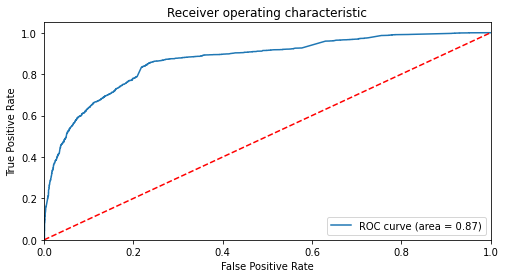

In [182]:
# Calling the roc curve function for plotting

edu_roc(y_train_pred_final2.Converted, y_train_pred_final2.Converted_probability)

Points to be concluded from above roc curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 87% of the total area.

## Conclusion from RFE Test - 1 & Test - 2

Important points to be drawn from both tests - 
 - For Test - 1, we saw that the auc score is 0.88 in ROC curve plot.
 - For Test - 2, we saw that the auc score is 0.87 in ROC curve plot.

So, the model created by RFE-1 is better than RFE-2

## Prediction the test dataset

### Scaling the test dataset

In [183]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

### Now Predicting

In [184]:
# Predicting the test dataset with our final model

test_cols=X_train_5.columns[1:]             
X_test_final=X_test[test_cols]               
X_test_final=sm.add_constant(X_test_final)  
y_pred_test=reg5.predict(X_test_final)      

In [185]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   

,Converted,Converted_Probability,ID
4269,1,0.650203,4269
2376,1,0.899467,2376
7766,1,0.735555,7766
9199,0,0.072559,9199
4359,1,0.672628,4359


### Model Evaluation

In [186]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.650203,4269,1
2376,1,0.899467,2376,1
7766,1,0.735555,7766,1
9199,0,0.072559,9199,0
4359,1,0.672628,4359,1


In [187]:
# Checking the accuracy of the test dataset.

from sklearn import metrics   

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the score

Accuracy score in predicting test dataset : 0.8152958152958153


In [188]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      # Printing the recall score

Precision score: 0.7541412380122058
Recall score: 0.7899543378995434


## Lead Score assigning

In [189]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number']=Score.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.650203,4269,1,619003,65
2376,1,0.899467,2376,1,636884,90
7766,1,0.735555,7766,1,590281,74
9199,0,0.072559,9199,0,579892,7
4359,1,0.672628,4359,1,617929,67


# Conclusion

Analysis Insights -
 - We have high recall score than precision score which we were exactly looking for.
 - This model has an ability to adjust with the company’s requirements in coming future.
 - Features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - Current occupation_Working Professional
    - Last Notable Activity_Had a Phone Conversation
    - Lead Origin_Lead Add Form
    